In [23]:
# Import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('book.csv')
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
df.shape

(2000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
score1 = apriori(df, min_support = 0.1, use_colnames = True)
score1['Length'] = score1['itemsets'].apply(lambda x : len(x))
score1

,support,itemsets,Length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


In [ ]:
# Slicing using support value and length.

In [7]:
#Rules with min_support >= 0.18 and length = 2

score1[(score1['support'] >= 0.18) & (score1['Length'] == 2)]

,support,itemsets,Length
10,0.2560,"(CookBks, ChildBks)",2
11,0.1840,"(DoItYBks, ChildBks)",2
14,0.1950,"(GeogBks, ChildBks)",2
19,0.1875,"(CookBks, DoItYBks)",2
22,0.1925,"(CookBks, GeogBks)",2


In [8]:
#Rules with min_support >= 0.12 and length = 3

score1[(score1['support'] >= 0.12) & (score1['Length'] == 3)]

,support,itemsets,Length
29,0.1290,"(YouthBks, CookBks, ChildBks)",3
30,0.1460,"(CookBks, DoItYBks, ChildBks)",3
31,0.1225,"(CookBks, ChildBks, RefBks)",3
32,0.1265,"(ArtBks, CookBks, ChildBks)",3
33,0.1495,"(CookBks, GeogBks, ChildBks)",3


In [9]:
#Model Building

model1 = association_rules(score1, metric ='lift', min_threshold = 1)
model1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [10]:
#Rules with support >= 0.15 and confidence >= 0.7

model1[(model1['support'] >= 0.15) & (model1['confidence'] >= 0.7)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
10,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
23,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556


In [11]:
#Rules with support >= 0.2 and confidence >= 0.5

model1[(model1['support'] >= 0.2) & (model1['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

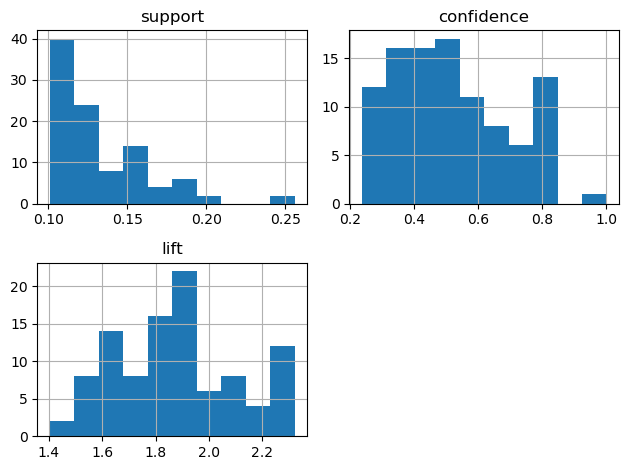

In [12]:
#Distribution of data

model1[['support', 'confidence', 'lift']].hist()
plt.tight_layout()

Text(0, 0.5, 'Confidence')

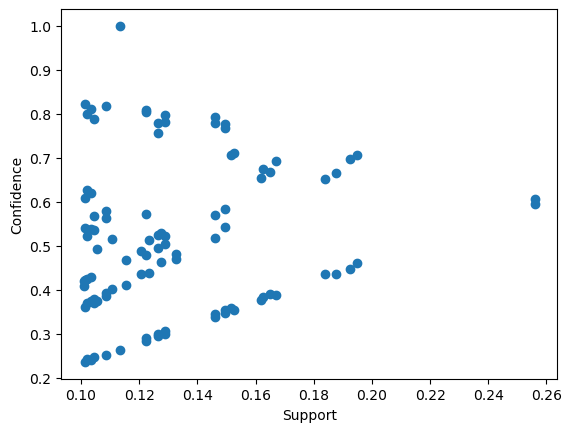

In [14]:
plt.scatter(model1['support'], model1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')

In [16]:
#Rules

score2 = apriori(df, min_support = 0.15, use_colnames = True)
score2['Length'] = score2['itemsets'].apply(lambda x : len(x))
score2

,support,itemsets,Length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1650,"(YouthBks, ChildBks)",2
8,0.2560,"(CookBks, ChildBks)",2
9,0.1840,"(DoItYBks, ChildBks)",2


In [17]:
# Slicing using support value and length.

In [18]:
#Rules with min_support >= 0.18 and length = 2

score2[(score2['support'] >= 0.18) & (score2['Length'] == 2)]

,support,itemsets,Length
8,0.2560,"(CookBks, ChildBks)",2
9,0.1840,"(DoItYBks, ChildBks)",2
12,0.1950,"(GeogBks, ChildBks)",2
14,0.1875,"(CookBks, DoItYBks)",2
17,0.1925,"(CookBks, GeogBks)",2


In [19]:
#Model Building

model2 = association_rules(score2, metric ='lift')
model2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


In [20]:
#Rules with support >= 0.17 and confidence >= 0.65

model2[(model2['support'] >= 0.17) & (model2['confidence'] >= 0.65)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
10,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
15,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
21,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766


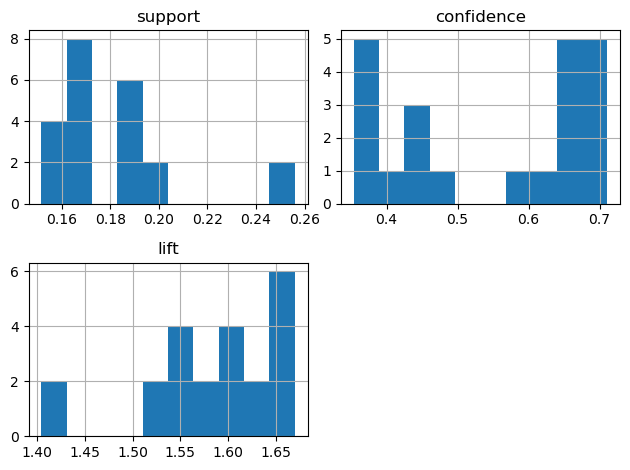

In [21]:
#Distribution of data

model2[['support', 'confidence', 'lift']].hist()
plt.tight_layout()

Text(0, 0.5, 'Confidence')

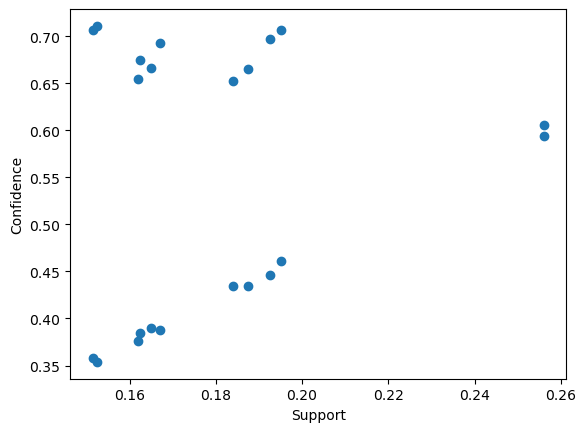

In [25]:
plt.scatter(model2['support'], model2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')

In [26]:
score3 = apriori(df, min_support = 0.2, use_colnames = True)
score3['Length'] = score3['itemsets'].apply(lambda x : len(x))
score3

,support,itemsets,Length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(CookBks, ChildBks)",2


In [27]:
model3 = association_rules(score3, metric = 'lift')
model3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
